In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/home/cmdunham/ChemicalDataGeneration/data/ccs_library_v2.csv'
df = pd.read_csv(file_path)

In [3]:
# !pip install openpyxl
file_path = '/home/cmdunham/ChemicalDataGeneration/data/METLIN-CCS-03-15-2024.xlsx'
df = pd.read_excel(file_path)

In [4]:
df.head()

,Molecule Name,Molecular Formula,METLIN ID,Precursor Adduct,CCS1,CCS2,CCS3,CCS_AVG,% CV,m/z,...,Unnamed: 11,Unnamed: 12,m/z.1,Unnamed: 14,Dimer,Dimer.1,Unnamed: 17,dimer line,CCS,m/z.2
0,"({[(2,4,6-trimethylphenyl)carbamoyl]methyl}car...",C25H37N3O5,1133361.0,460.2806[M+H],214.67,214.67,214.29,214.543333,0.102261,460.2806,...,H,NaN,460.2806,NaN,245.447538,Monomer,NaN,NaN,135.0,50.0
1,({[(2-chlorophenyl)carbamoyl]methyl}(methyl)ca...,C24H21ClN2O5,1206876.0,453.1212[M+H],222.35,223.11,222.54,222.666667,0.177627,453.1212,...,NaN,NaN,453.1212,NaN,243.520227,Monomer,NaN,NaN,310.0,700.0
2,({[(4-fluorophenyl)carbamoyl]methyl}(methyl)ca...,C21H23F2N3O7S,1210764.0,500.1298[M+H],216.50,214.99,218.20,216.563333,0.741555,500.1298,...,NaN,NaN,500.1298,NaN,256.174942,Monomer,NaN,NaN,NaN,NaN
3,"({[1,1'-biphenyl]-2-yl}carbamoyl)methyl (2S)-1...",C25H23FN2O5S,1202850.0,483.1384[M+H],206.87,206.49,207.25,206.870000,0.183690,483.1384,...,NaN,NaN,483.1384,NaN,251.600857,Monomer,NaN,NaN,NaN,NaN
4,"({[1,1'-biphenyl]-2-yl}carbamoyl)methyl 1,3-th...",C18H14N2O3S,1188636.0,339.0798[M+H],180.55,177.23,180.55,179.443333,1.068194,339.0798,...,NaN,NaN,339.0798,NaN,212.820282,Monomer,NaN,NaN,NaN,NaN


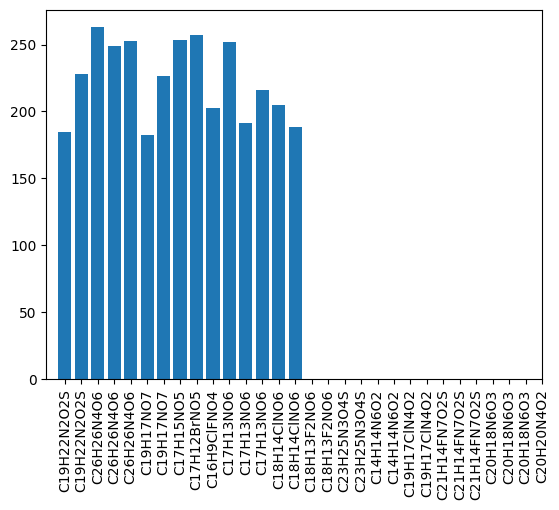

In [9]:
df_sorted = df.sort_values(by='Molecule Name')
len(df_sorted['Molecular Formula'][:30].unique())

# sns.relplot(data=df_sorted, x=df_sorted['CCS_AVG'][:30], y=df_sorted['m/z'][:30], hue=df_sorted['Molecular Formula'][:30])
plt.bar(df_sorted['Molecular Formula'][:30], df_sorted['CCS_AVG'][:30])
plt.xticks(range(len(df_sorted['Molecular Formula'][:30])), df_sorted['Molecular Formula'][:30], rotation=90)
plt.show()

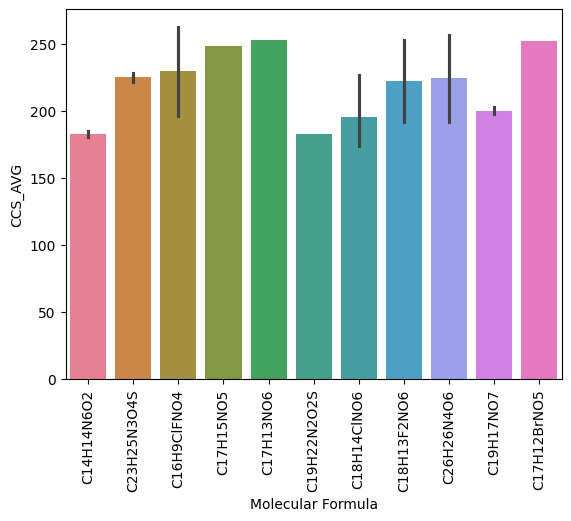

In [26]:
slice_num = 20
sns.barplot(data=df_sorted, x=df_sorted['Molecular Formula'][:slice_num], y=df_sorted['CCS_AVG'][:slice_num], hue=df_sorted['Molecular Formula'][:slice_num])
# plt.yticks(range(round(min(df_sorted['CCS_AVG'][:slice_num])), round(max(df_sorted['CCS_AVG'][:slice_num]))), df_sorted['CCS_AVG'][:slice_num])
plt.xticks(range(len(set(df_sorted['Molecular Formula'][:slice_num]))), list(set(df_sorted['Molecular Formula'][:slice_num])), rotation=90)
# sns.barplot(data=df_sorted, x=df_sorted['m/z'][:slice_num], y=df_sorted['CCS_AVG'][:slice_num], hue=df_sorted['Molecular Formula'][:slice_num])
# plt.xticks(range(len(set(df_sorted['m/z'][:slice_num]))), list(set(df_sorted['m/z'][:slice_num])), rotation=90)
plt.show()

In [44]:
thing = df[:][:100]
thing.shape

(100, 21)

In the plots below we see the Collision Cross Section Average for each sample, divided into groups by molecule. We can see that CCS appears to be variable across samples for the same molecule. CCS average alone does not appear to be a useful feature for identifying molecules, as multiple molecules fall within the same ranges.

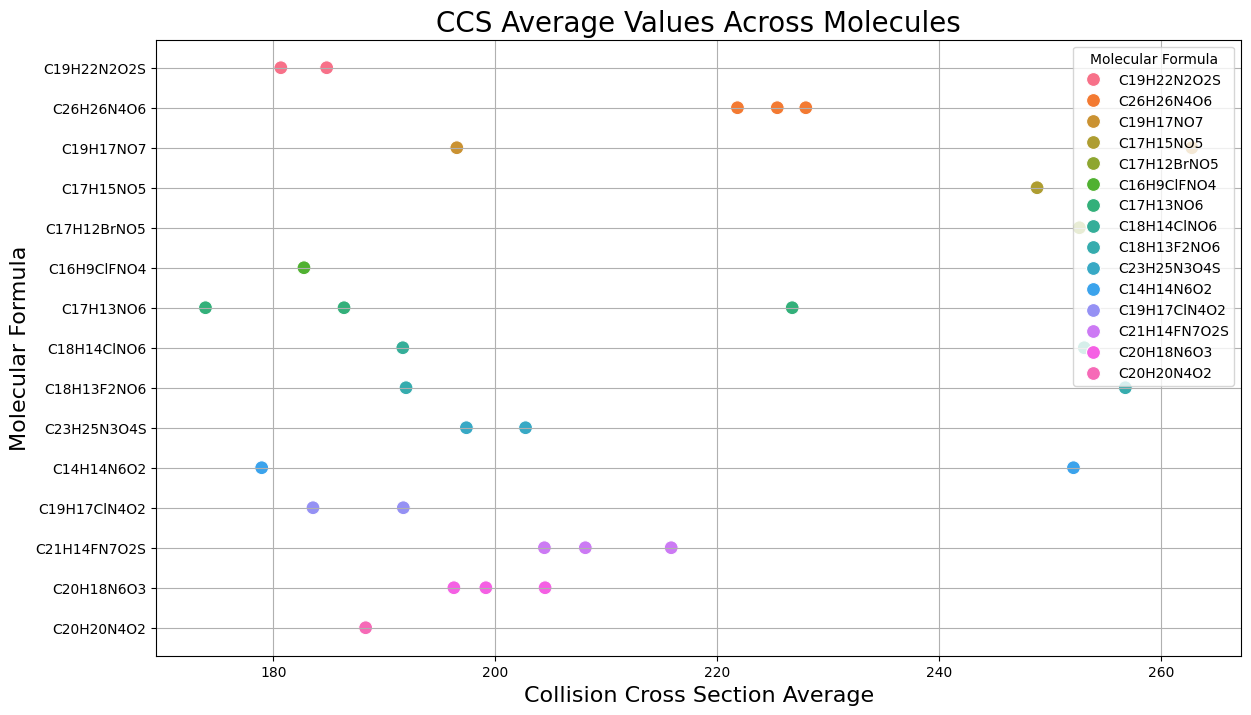

In [83]:
fig, ax = plt.subplots(figsize=(14, 8))
slice_num = 30

sns.scatterplot(data=df_sorted[:][:slice_num], x='CCS_AVG', y='Molecular Formula', hue='Molecular Formula', legend="brief", ax=ax, s=100)
sns.move_legend(ax, 'upper right')

# plt.xticks([])
plt.xlabel('Collision Cross Section Average', fontsize=16)
plt.ylabel('Molecular Formula', fontsize=16)
plt.title('CCS Average Values Across Molecules', fontsize=20)
plt.grid()
plt.show()

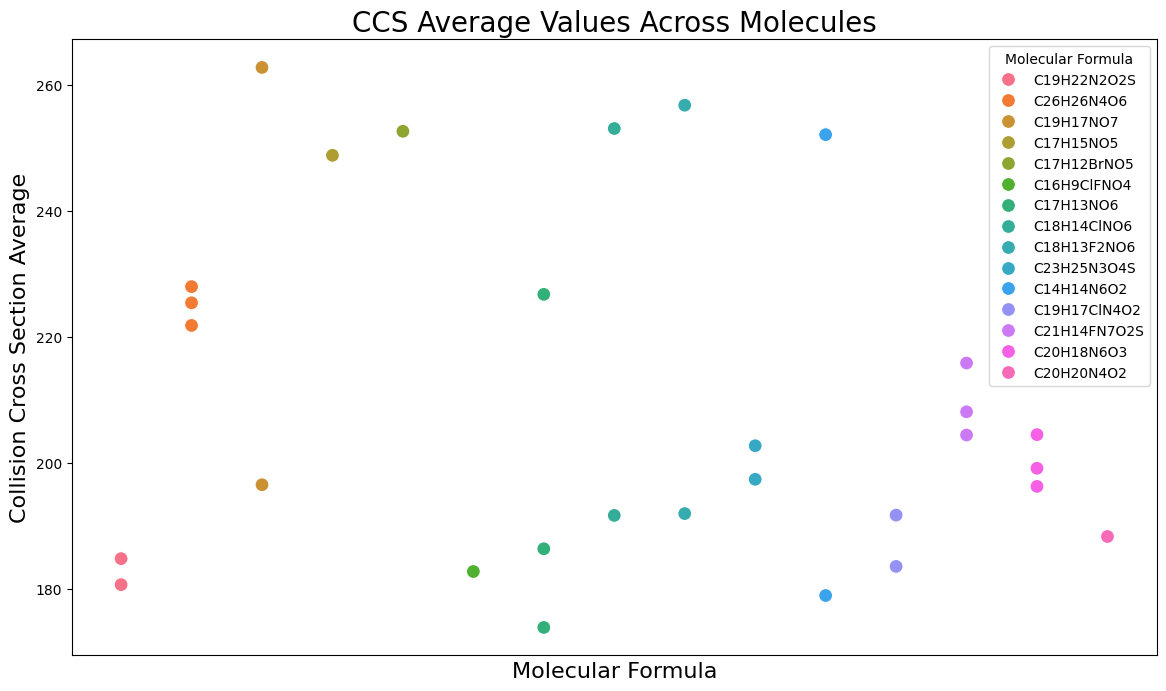

In [85]:
fig, ax = plt.subplots(figsize=(14, 8))
slice_num = 30

# sns.scatterplot(data=df_sorted[:][:slice_num], x=range(len(df_sorted['CCS_AVG'][:slice_num])), y='CCS_AVG', hue='Molecular Formula', legend="brief", ax=ax)
sns.scatterplot(data=df_sorted[:][:slice_num], x='Molecular Formula', y='CCS_AVG', hue='Molecular Formula', legend="brief", ax=ax, s=100)

plt.xticks([])
plt.ylabel('Collision Cross Section Average', fontsize=16)
plt.xlabel('Molecular Formula', fontsize=16)
plt.title('CCS Average Values Across Molecules', fontsize=20)
# plt.grid()
plt.show()

CSS Average when combined with some other feature may be useable for molecular identification. Looking at m/z and CCS for each molecule's samples.

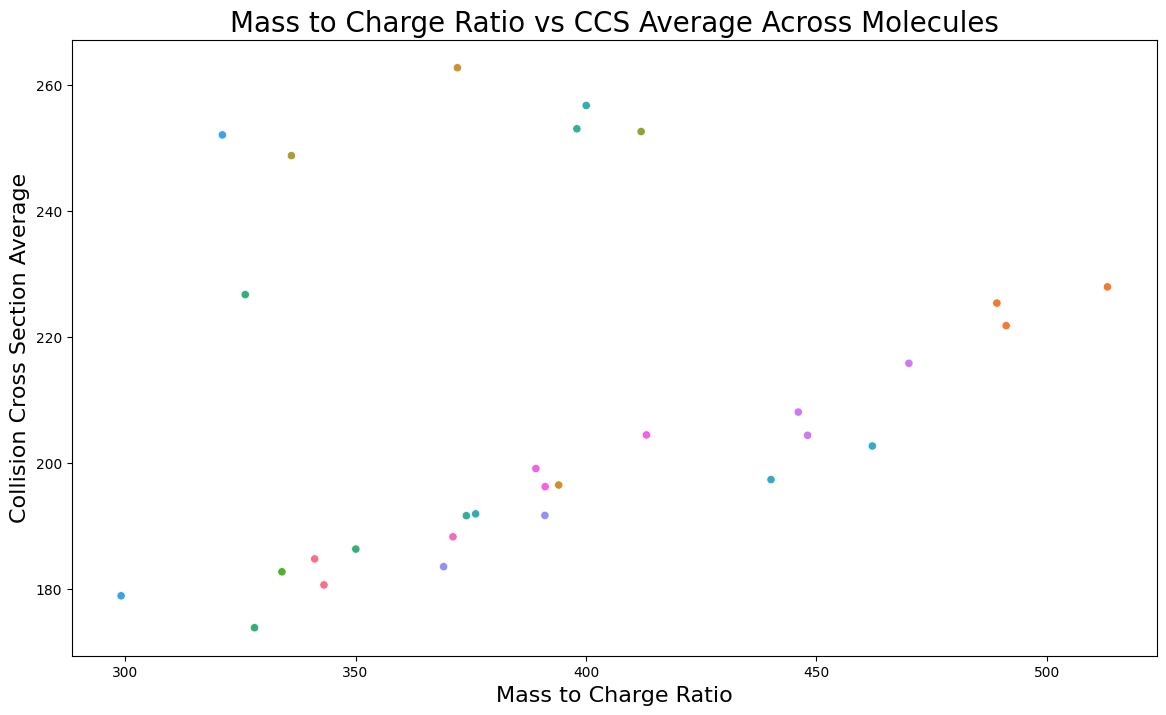

In [89]:
fig, ax = plt.subplots(figsize=(14, 8))
slice_num = 30
sns.scatterplot(data=df_sorted[:][:slice_num], x='m/z', y='CCS_AVG', hue='Molecular Formula', ax=ax, legend=False)
plt.xlabel('Mass to Charge Ratio', fontsize=16)
plt.ylabel('Collision Cross Section Average', fontsize=16)
plt.title('Mass to Charge Ratio vs CCS Average Across Molecules', fontsize=20)
# plt.grid()
plt.show()

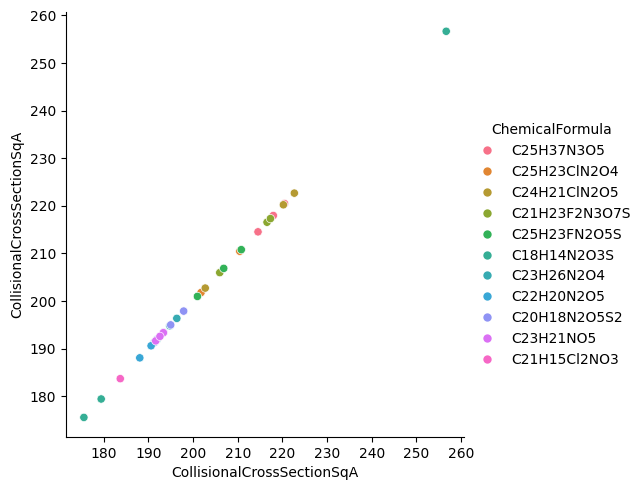

In [23]:
sns.relplot(data=df, x=df['CollisionalCrossSectionSqA'][:30], y=df['CollisionalCrossSectionSqA'], hue=df['ChemicalFormula'][:30])
plt.show()

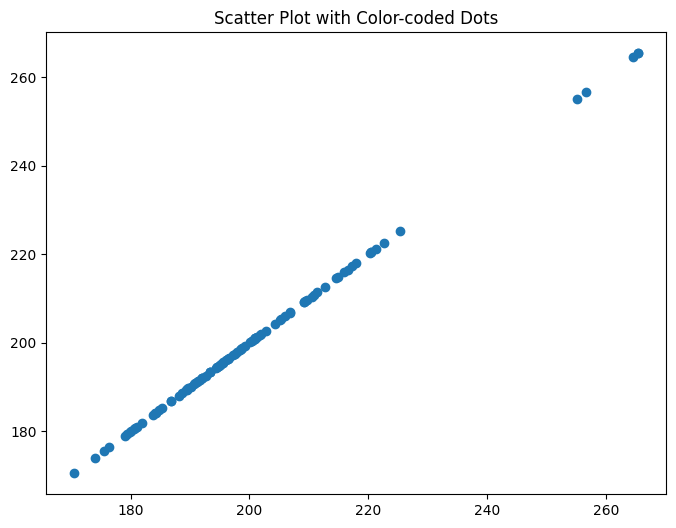

In [16]:
# # min(data['CollisionalCrossSectionSqA'])


# # Create the scatter plot
# plt.figure(figsize=(8, 6))
# plt.scatter(x=data['CollisionalCrossSectionSqA'][:100], y=data['CollisionalCrossSectionSqA'][:100], label=data['ChemicalFormula'][:100])

# # plt.xlabel('X')
# # plt.ylabel('Y')
# plt.title('Scatter Plot with Color-coded Dots')

# plt.show()